<a href="https://colab.research.google.com/github/mr-nudo/intelligent-tools/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting global seed

In [3]:
import os
import tensorflow as tf
import numpy as np
import random

# Set a seed value
seed_value = 25

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)



# Importing the libraries

In [4]:
# Import other necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the dataset

In [5]:
# Create_image_generators() function
def create_image_generators(train_dir, target_size=(150, 150), batch_size=20, val_split=0.2):
    """
    Create training and validation generators for image data.

    Parameters:
    - base_dir: Path to the base directory where the 'train' folder is located.
    - target_size: Tuple of integers, the dimensions to which all images found will be resized.
    - batch_size: Integer, size of the batches of data.
    - val_split: Float, the fraction of images reserved for validation.

    Returns:
    - train_generator: Training data generator.
    - validation_generator: Validation data generator.
    """

    # Image Data Generator for both training and validation
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=val_split
    )

    # Training data generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training',
        seed=25
    )

    # Validation data generator
    validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation',
        seed=25
    )

    return train_generator, validation_generator

train_dir = '/content/train'
train_generator, validation_generator = create_image_generators(train_dir)

Found 148 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [8]:
def print_generator_info(generator):
    """
    Print information about a data generator.

    Parameters:
    - generator: The data generator (train or validation).
    """
    # Number of images
    num_images = generator.samples
    # Batch size
    batch_size = generator.batch_size
    # Class indices
    class_indices = generator.class_indices
    # Number of classes
    num_classes = generator.num_classes
    # Filenames
    filenames = generator.filenames

    print(f"Number of images: {num_images}")
    print(f"Batch size: {batch_size}")
    print(f"Class indices: {class_indices}")
    print(f"Number of classes: {num_classes}")
    print(f"Number of filenames loaded: {len(filenames)}")  # Number of filenames might be large

# Example usage:
print("Training Generator Info:")
print_generator_info(train_generator)
print("\nValidation Generator Info:")
print_generator_info(validation_generator)


Training Generator Info:
Number of images: 148
Batch size: 20
Class indices: {'.ipynb_checkpoints': 0, 'not_polar': 1, 'polar': 2}
Number of classes: 3
Number of filenames loaded: 148

Validation Generator Info:
Number of images: 36
Batch size: 20
Class indices: {'.ipynb_checkpoints': 0, 'not_polar': 1, 'polar': 2}
Number of classes: 3
Number of filenames loaded: 36


# Define the CNN model

In [9]:
def create_cnn_model():
    model = Sequential()

    # First Conv2D layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    # First MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Conv2D layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Second MaxPooling2D layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Dropout layer
    model.add(Dropout(0.5))

    # Dense layer with 512 units
    model.add(Dense(512, activation='relu'))

    # Output Dense layer for binary classification
    model.add(Dense(1, activation='sigmoid'))

    return model

In [10]:
model = create_cnn_model()

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dropout (Dropout)           (None, 82944)             0

In [11]:
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")

Total number of parameters: 42487745


# Compile and fit the CNN model

In [12]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: -410.9418 - accuracy: 0.4797 - val_loss: -1830.6007 - val_accuracy: 0.4722
Epoch 2/20
8/8 [==============================] - 13s 2s/step - loss: -4651.2520 - accuracy: 0.4865 - val_loss: -12571.4570 - val_accuracy: 0.4722
Epoch 3/20
8/8 [==============================] - 13s 2s/step - loss: -24686.1113 - accuracy: 0.4865 - val_loss: -51274.2031 - val_accuracy: 0.4722
Epoch 4/20
8/8 [==============================] - 13s 2s/step - loss: -86531.7266 - accuracy: 0.4865 - val_loss: -163457.8750 - val_accuracy: 0.4722
Epoch 5/20
8/8 [==============================] - 12s 2s/step - loss: -243511.7031 - accuracy: 0.4865 - val_loss: -440835.8438 - val_accuracy: 0.4722
Epoch 6/20
8/8 [==============================] - 13s 2s/step - loss: -630073.8125 - accuracy: 0.4865 - val_loss: -1049097.2500 - val_accuracy: 0.4722
Epoch 7/20
8/8 [==============================] - 13s 2s/step - loss: -1377434.0000 - accuracy: 0.4865 - val_l

# Plot Training and Validation accuracies

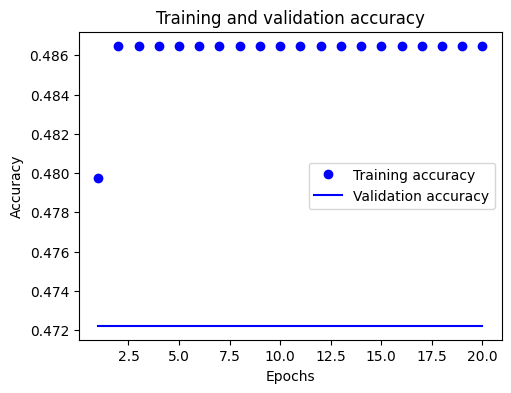

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)
# print(epochs)

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation losses

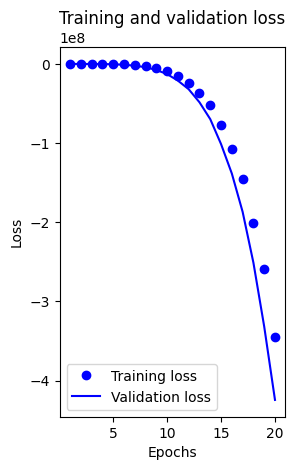

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training & validation accuracy losses
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Testing


In [22]:
def load_display_predict_image(img_path, model, size=(150, 150)):
    """
    Load, preprocess, display, and predict the class of an image using a given model.

    Parameters:
    - img_path: String, path to the image file.
    - model: TensorFlow/Keras model that will be used to predict the image.
    - size: Tuple of integers, target size of the image (height, width).
    """
    # Load an image file to PIL format, target size can be adjusted
    img = image.load_img(img_path, target_size=size)

    # Convert the PIL image to a numpy array
    img_array = image.img_to_array(img)

    # Add a dimension to transform the array into a batch shape
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize the image pixels to [0, 1]
    img_array /= 255.0

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict using the provided model
    prediction = model.predict(img_array)

    print(prediction)
    print("Polar Bear" if prediction[0][0] > 0.5 else "Not Polar Bear")

## Inference for test_1.jpg

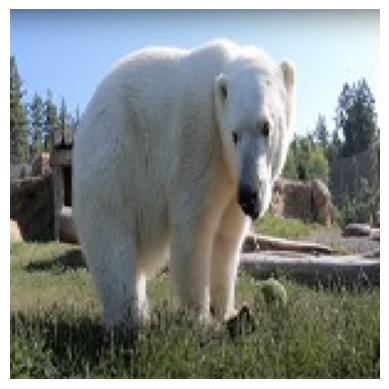

1/1 [==============================] - 0s 159ms/step
[[1.]]
Polar Bear


In [29]:
img_path = '/content/test/test_1.jpg'
load_display_predict_image(img_path, model)

## Inference for test_2.jpg

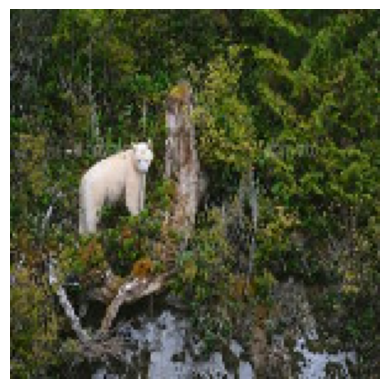

1/1 [==============================] - 0s 132ms/step
[[1.]]
Polar Bear


In [24]:
img_path = '/content/test/test_2.jpg'
load_display_predict_image(img_path, model)

## Inference for test_3.jpg

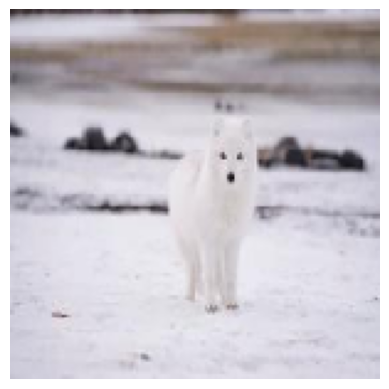

1/1 [==============================] - 0s 61ms/step
[[1.]]
Polar Bear


In [25]:
img_path = '/content/test/test_3.jpg'
load_display_predict_image(img_path, model)

## Inference for test_4.jpg

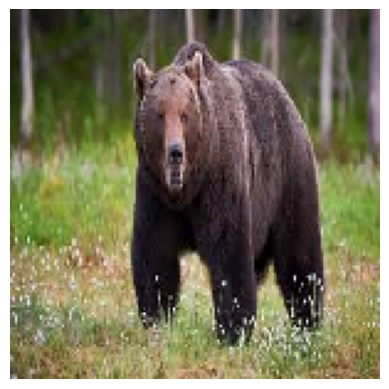

1/1 [==============================] - 0s 65ms/step
[[1.]]
Polar Bear


In [26]:
img_path = '/content/test/test_4.jpg'
load_display_predict_image(img_path, model)

## Inference for test_5.jpg

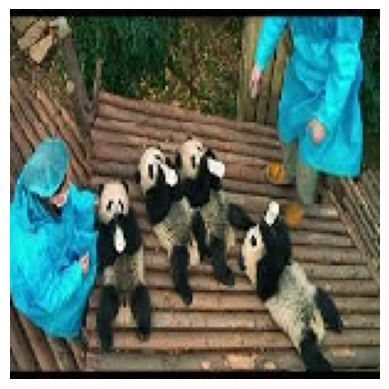

1/1 [==============================] - 0s 63ms/step
[[1.]]
Polar Bear


In [27]:
img_path = '/content/test/test_5.jpg'
load_display_predict_image(img_path, model)

## Inference for test_6.jpg

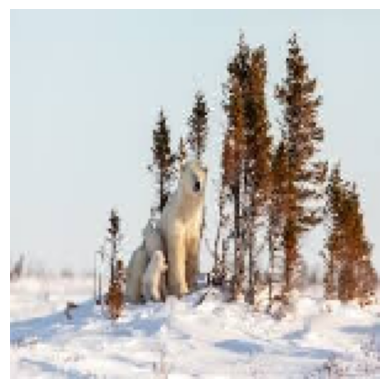

1/1 [==============================] - 0s 61ms/step
[[1.]]
Polar Bear


In [28]:
img_path = '/content/test/test_6.jpg'
load_display_predict_image(img_path, model)

The model might be too simple to capture the complexity or there might not have been sufficient training data.

**Solution**: Experiment with different architectures, ensuring an appropriate balance between model complexity and the amount of training data.

# Visualize layer activations

In [30]:
# Load and preprocess an image
def load_image(img_path, size=(150,150)):
    img = image.load_img(img_path, target_size=size)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.
    return img_tensor

# Define a function to display the activations
def display_layer_activations(activations, model):
    layer_names = [layer.name for layer in model.layers[:4]]
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image = np.maximum(channel_image, 0) / max(channel_image.std(), 1e-5)
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

1/1 [==============================] - 0s 83ms/step


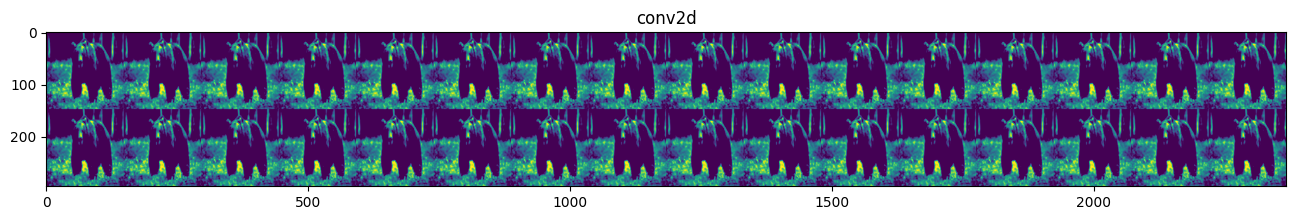

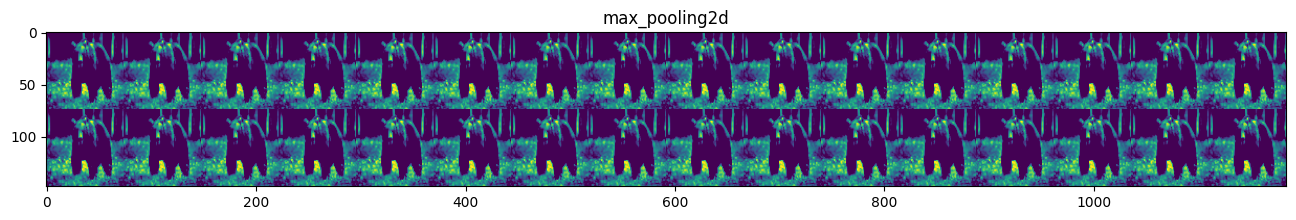

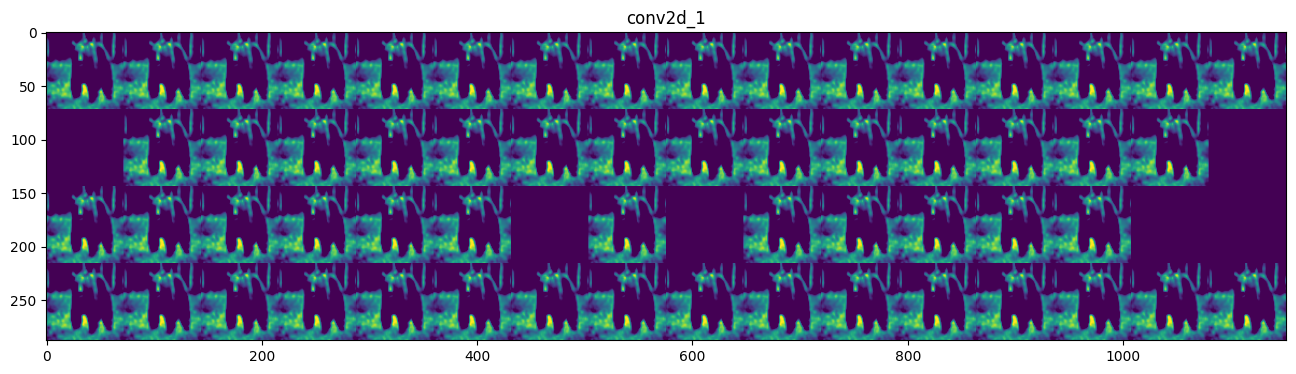

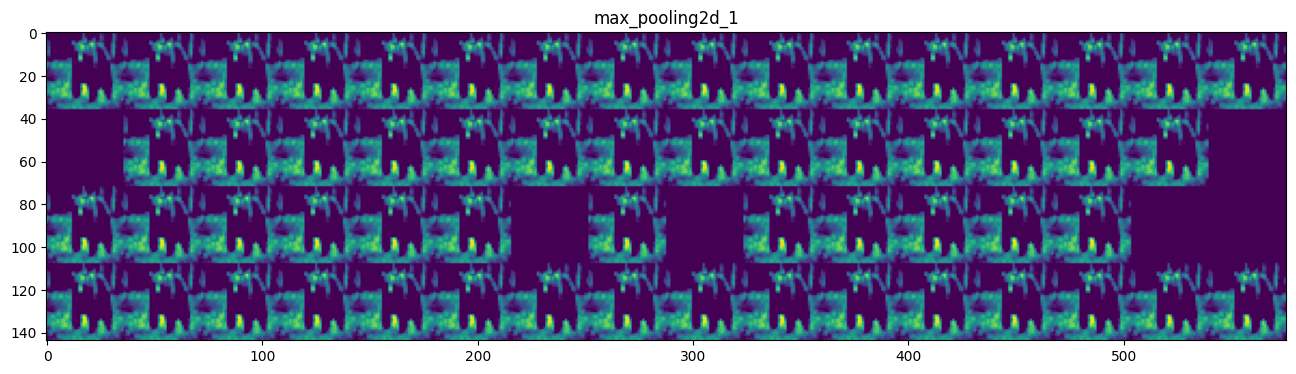

In [31]:
# TODO: Define a function to create a model that returns output from each layer
def get_layer_outputs(model, img_tensor):
    # Extracts outputs for all layers up to the last MaxPooling layer (index 3)
    layer_outputs = [layer.output for layer in model.layers[:4]]

    # Creates a new model that will return these outputs, given the model input
    activation_model = Model(inputs=model.input, outputs=layer_outputs)

    # Predicts the activations for the input image tensor
    activations = activation_model.predict(img_tensor)

    # Returns a list of numpy arrays, one array per layer activation
    return activations


# Load and preprocess an image
img_path = '/content/test/test_4.jpg'
new_image = load_image(img_path)

# Get activations and display them
activations = get_layer_outputs(model, new_image)
display_layer_activations(activations, model)

Comments on increasing abstractness...

**Low-Level Features:** Early layers (e.g., first convolutional layer) focus on basic features such as edges, gradients, and textures. These features are still closely related to the original image and are relatively easy to interpret.

**High-Level Features:** Deeper layers (e.g., second convolutional layer and beyond) combine these basic features to form higher-level abstractions, such as shapes, patterns, and object parts. These features are more abstract and less visually similar to the original image.

**Spatial Reduction:** MaxPooling layers reduce the spatial dimensions of the activations, focusing on the most important features and reducing the computational complexity of subsequent layers. This makes the representation more abstract and compact, preserving only the essential information.